This jupyter notebook file demonstrates basic commands used for generating model spectra using sfh=3 (tabular SFH option) and intrinsic SFH convolution within FSPS, in this example sfh=4 (delayed tau SFH). We show here that both produce similar spectra, and the spectra generation only care about the duration (time period) since the start of star formation and the galaxy's age  

### (1) The following script show two spectra, first with sf_start=3.0Gyr and tage=8.0Gyr (both are times since the Big Bang), the second one with sf_start=0.0Gyr and tage=5.0Gyr (both are times since the start of star formation). It is shown here that two spectra are the same. It means that the spectra generation only care about the duration or time period from start of star fotmation to the age of the system.

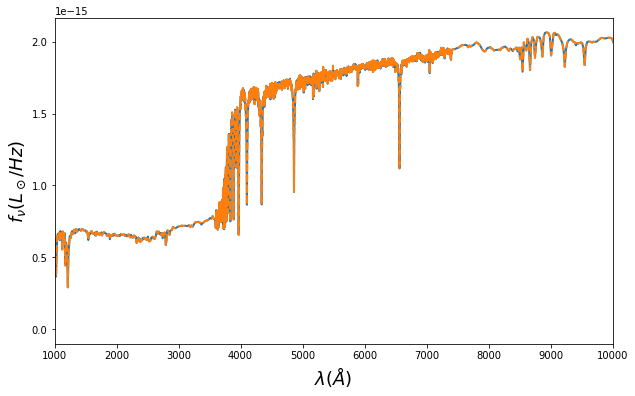

In [2]:
import fsps
import matplotlib.pyplot as pl

sps = fsps.StellarPopulation()

sps.params["sfh"] = 4  #delayed_exponential
sps.params["tau"] = 2.0
sps.params["const"] = 0
sps.params["sf_start"] = 3.0
sps.params["sf_trunc"] = 0
sps.params["fburst"] = 0
sps.params["tburst"] = 30.0
sps.params["tage"] = 8.0
wavelength, spectrum = sps.get_spectrum(tage=8.0)

sps1 = fsps.StellarPopulation()
sps1.params["sfh"] = 4  #delayed_exponential
sps1.params["tau"] = 2.0
sps1.params["const"] = 0
sps1.params["sf_start"] = 0.0
sps1.params["sf_trunc"] = 0
sps1.params["fburst"] = 0
sps1.params["tburst"] = 30.0
sps1.params["tage"] = 5.0
wavelength1, spectrum1 = sps1.get_spectrum(tage=5.0)

# Plot the SFR
fig1 = pl.figure(figsize=(10,6))
f1 = pl.subplot()
pl.plot(wavelength, spectrum, lw=2, linestyle='-')
pl.plot(wavelength1, spectrum1, lw=2, linestyle='--')
pl.xlim(1e3, 1e4)
pl.xlabel(r'$\lambda (\AA)$', fontsize=18)
pl.ylabel(r'$f_\nu (L_\odot/Hz)$', fontsize=18)
pl.show()

### (2) The following scripts show 4 spectra: (a) spectum obtained using intrinsic SFH convolution within FSPS with sf_start=3Gyr and tage=max age (for extracting the spectrum), (b) spectrum obtained via tabular sfh option with tabular SFH data just copied from the (sfh_age,sfh_sfr), (c) spectum obtained using intrinsic SFH convolution within FSPS with sf_start=0Gyr and tage=max age-3.0Gyr, and (d) spectrum obtained via tabular sfh option with mpdified tabular SFH data (sfh_age-3.0Gyr,sfh_sfr) 

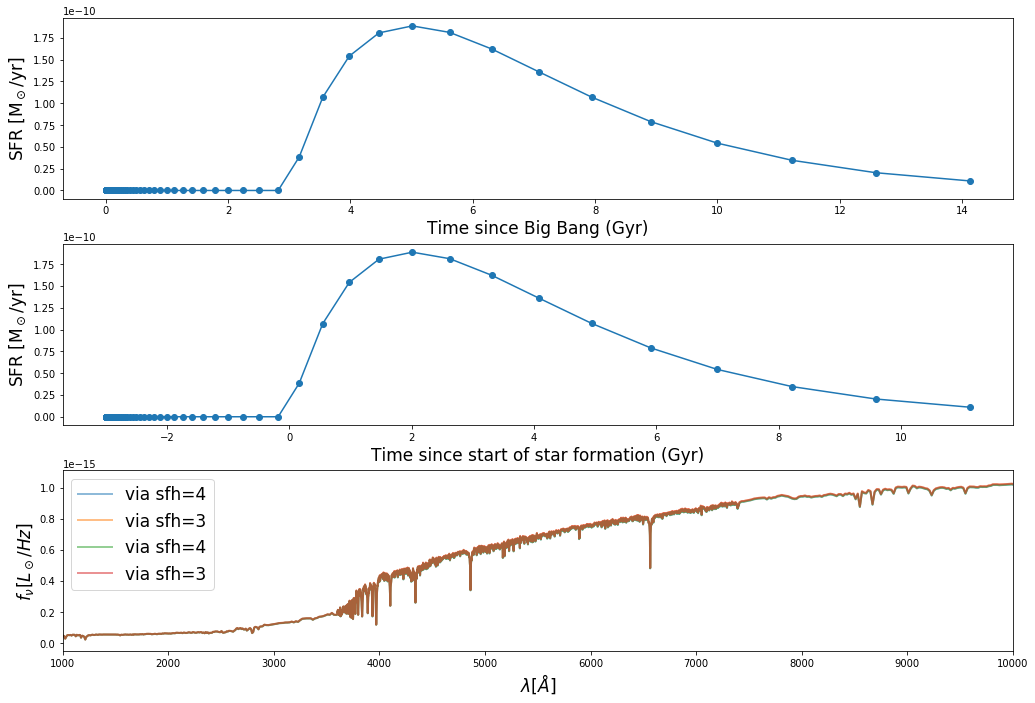

In [4]:
# get the spectrum via the intrinsic SFH convolutions
sps = fsps.StellarPopulation()
sps.params["sfh"] = 4  #delayed_exponential
sps.params["tau"] = 2.0
sps.params["const"] = 0
sf_start = 3.0
sps.params["sf_start"] = sf_start
sps.params["sf_trunc"] = 0
sps.params["fburst"] = 0
sps.params["tburst"] = 30.0
sfh_age = (10**sps.log_age)/1e9
sfh_sfr = sps.sfr
sfh_age_max = max(sfh_age)
wavelength, spectrum = sps.get_spectrum(tage=sfh_age_max)


# get the spectrum from a tabular version
sps1 = fsps.StellarPopulation()
sps1.params["sfh"] = 3
sps1.set_tabular_sfh(sfh_age, sfh_sfr)
wavelength1, spectrum1 = sps1.get_spectrum(tage=sfh_age_max)


# get the spectrum via the intrinsic SFH convolutions
sps2 = fsps.StellarPopulation()
sps2.params["sfh"] = 4  #delayed_exponential
sps2.params["tau"] = 2.0
sps2.params["const"] = 0
sps2.params["sf_start"] = 0.0
sps2.params["sf_trunc"] = 0
sps2.params["fburst"] = 0
sps2.params["tburst"] = 30.0
tage = sfh_age_max - sf_start
sps2.params["tage"] = tage
wavelength2, spectrum2 = sps2.get_spectrum(tage=tage)


# get the spectrum from a tabular version
sps3 = fsps.StellarPopulation()
sps3.params["sfh"] = 3
sfh_age_new = sfh_age - sf_start
sps3.set_tabular_sfh(sfh_age_new, sfh_sfr)
wavelength3, spectrum3 = sps3.get_spectrum(tage=sfh_age_max-sf_start)


# Plot the SFR
fig, axes = pl.subplots(3, 1, figsize=(15,10))
axes[0].plot(sfh_age, sfh_sfr, '-o')
axes[0].set_xlabel('Time since Big Bang (Gyr)', fontsize=17)
axes[0].set_ylabel(r'SFR [M$_\odot$/yr]', fontsize=17)

axes[1].plot(sfh_age_new, sfh_sfr, '-o')
axes[1].set_xlabel('Time since start of star formation (Gyr)', fontsize=17)
axes[1].set_ylabel(r'SFR [M$_\odot$/yr]', fontsize=17)

axes[2].plot(wavelength, spectrum, label="via sfh=4", alpha=0.5, lw=2)
axes[2].plot(wavelength1, spectrum1, label="via sfh=3", alpha=0.5, lw=2)
axes[2].plot(wavelength2, spectrum2, label="via sfh=4", alpha=0.5, lw=2)
axes[2].plot(wavelength3, spectrum3, label="via sfh=3", alpha=0.5, lw=2)
axes[2].set_xlim(1e3, 1e4)
axes[2].set_xlabel(r'$\lambda [\AA]$', fontsize=17)
axes[2].set_ylabel(r'$f_\nu [L_\odot/Hz]$', fontsize=17)
axes[2].legend(loc=0, fontsize=17)

pl.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98, wspace=0.05, hspace=0.25)
pl.show()